In [1]:
!git clone https://github.com/vishnuchandramc/ML_DL_project_final.git

Cloning into 'ML_DL_project_final'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 188 (delta 37), reused 4 (delta 2), pack-reused 109
Receiving objects: 100% (188/188), 4.12 MiB | 21.75 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [2]:
!ls

ML_DL_project_final  sample_data


In [3]:
import pandas as pd
import pickle

In [4]:
data = pd.read_csv('ML_DL_project_final/predicted_data.csv', index_col=0)
data

,Interest_Payments,Aggregate_Expenditure,Outstanding_Liabilities,Capital_Expenditure,Revenue_Expenditure,Capital_Receipts,Fiscal_Deficits,Aggregate_Receipts,Revenue_Receipts,Revenue_Deficits,Social_Sector_Expenditure,Own_Tax_Revenues
Andhra Pradesh,1.391812e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05
Arunachal Pradesh,1.658712e+05,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03
Assam,3.697124e+03,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04
Bihar,3.234954e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04
Chhattisgarh,9.130644e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04
Goa,1.003832e+04,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03
Gujarat,8.426166e+03,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05
Haryana,1.224664e+05,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04
Himachal Pradesh,7.000123e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04
Jammu & Kashmir,1.371401e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04


In [5]:
data.index.values

array(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All States', 'Delhi', 'Puducherry'],
      dtype=object)

In [6]:
filename = 'ML_DL_project_final/gdp_model.sav'
scalerfile = 'ML_DL_project_final/gdp_scale.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_scaler = pickle.load(open(scalerfile, 'rb'))

In [7]:
predicted_data = []
for state in data.iterrows():
    scaled = loaded_scaler.transform(state[1].values.reshape(1, -1))
    predicted = loaded_model.predict(scaled)
    predicted_data.append(predicted[0])

In [8]:
predicted_frame = pd.DataFrame({'State':data.index.values, 'GDP_PREDICTED_2020':predicted_data})

In [9]:
pd.set_option('display.float_format', lambda x: '%.8f' %x)

In [10]:
predicted_frame

,State,GDP_PREDICTED_2020
0,Andhra Pradesh,10378291.88282439
1,Arunachal Pradesh,676791.04987538
2,Assam,1954795.30013809
3,Bihar,5587899.52900610
4,Chhattisgarh,852539.36385051
5,Goa,530318.87613741
6,Gujarat,7399887.20227001
7,Haryana,4553227.67655458
8,Himachal Pradesh,1015102.41889698
9,Jammu & Kashmir,2496643.86417651


In [12]:
original_data = pd.read_csv('ML_DL_project_final/Original_GDP.csv', index_col=0)

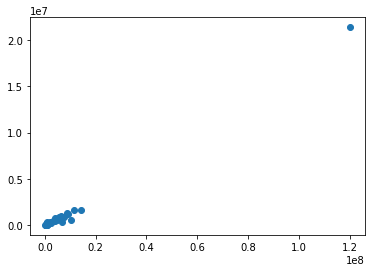

In [18]:

original_data.rename(columns = {"GDP_PREDICTED_2020": "GDP_ORIGINAL_2020"}, inplace = True)

In [19]:
original_data

,State,GDP_ORIGINAL_2020
0,Andhra Pradesh,584258.81540118
1,Arunachal Pradesh,25288.60485674
2,Assam,327630.13450452
3,Bihar,627220.84662344
4,Chhattisgarh,366187.07064146
5,Goa,53229.16310355
6,Gujarat,860725.48478053
7,Haryana,548836.36676193
8,Himachal Pradesh,111763.89305531
9,Jammu & Kashmir,213747.21501981


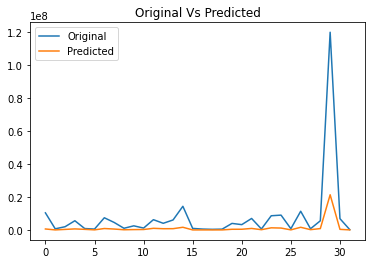

<Figure size 1200x800 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
# plt.scatter(predicted_frame["GDP_PREDICTED_2020"],original_data["GDP_ORIGINAL_2020"])


# plt.plot(scaler.inverse_transform(frame))
plt.plot(predicted_frame["GDP_PREDICTED_2020"])
plt.title('Original Vs Predicted')
plt.legend(['Original', 'Predicted'], loc='upper left')
plt.plot(original_data["GDP_ORIGINAL_2020"])
plt.legend(['Original', 'Predicted'], loc='upper left')
plt.figure(figsize=(12, 8), dpi=100)
plt.show()


In [49]:

plt.show()

<Figure size 1200x800 with 0 Axes>